# "[Mask2Former](https://arxiv.org/abs/2112.01527)" Tutorial

<img src="https://bowenc0221.github.io/images/maskformerv2_teaser.png" width="500"/>

Welcome to the [Mask2Former](https://github.com/facebookresearch/Mask2Former) in detectron2! In this tutorial, we will go through some basics usage of Mask2Former, including the following:
* Run inference on images or videos, with an existing Mask2Former model

You can make a copy of this tutorial or use "File -> Open in playground mode" to play with it yourself. **DO NOT** request access to this tutorial.


In [ ]:
!nvidia-smi

Thu Oct 13 08:44:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


# Install detectron2

In [ ]:
!pip install torch==1.10 torchvision --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     |██████████████▋                 | 834.1 MB 1.2 MB/s eta 0:13:12tcmalloc: large alloc 1147494400 bytes == 0x662b8000 @  0x7f5225afd615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |██████████████████▌             | 1055.7 MB 1.2 MB/s eta 0:10:14tcmalloc: large alloc 1434370048 bytes == 0x3ae0000 @  0x7f5225afd615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |███████████████████████▌        | 1

In [ ]:
# Install detectron2
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

torch:  1.10 ; cuda:  cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 118 kB/s 
     |████████████████████████████████| 130 kB 40.2 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 151 kB 68.7 MB/s 
     |████████████████████████████████| 843 kB 57.6 MB/s 
     |████████████████████████████████| 117 kB 74.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=0fe23e02279baf87cc4cffb4868d5b13d8422d288310158ca948d1deae564fed
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=1445

# Install Mask2Former

In [ ]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
!pip install git+https://github.com/cocodataset/panopticapi.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd ../../../../

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 297 (delta 126), reused 293 (delta 126), pack-reused 4
Receiving objects: 100% (297/297), 412.62 KiB | 16.50 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/Mask2Former
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-528xcxi4
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-528xcxi4
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=2fa61762f647b6383f803311bf9c98c1453195a03ccc51bb8d1cdaadc886e45c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqs1i9wx/wheels/ad/89/b8/b66cce9246

In [ ]:
!cd mask2former/modeling/pixel_decoder/ops && sh make.sh

running build
running build_py
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:782: UserWarning: The detected CUDA version (11.2) has a minor version mismatch with the version that was used to compile PyTorch (11.3). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
running install
running bdist_egg
running egg_info
writing MultiScaleDeformableAttention.egg-info/PKG-INFO
writing dependency_links to MultiScaleDeformableAttention.egg-info/dependency_links.txt
writing top-level names to MultiScaleDeformableAttention.egg-info/top_level.txt
writing manifest file 'MultiScaleDeformableAttention.egg-info/SOURCES.txt

> RESTART THE RUNTIME AFTER COMPILING, then execute next cell

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
%cd /content/Mask2Former
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
setup_logger(name="mask2former")

# import some common libraries
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow
import pandas as pd

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.projects.deeplab import add_deeplab_config
coco_metadata = MetadataCatalog.get("coco_2017_val_panoptic")

# import Mask2Former project
from mask2former import add_maskformer2_config

/content/Mask2Former


# Run a pre-trained Mask2Former model

We first download an image from the COCO dataset:

In [ ]:
# !wget http://images.cocodataset.org/val2017/000000005477.jpg -q -O input.jpg
!wget https://thomas-leduc.github.io/complexity/medium/1a.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
# cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
add_deeplab_config(cfg)
add_maskformer2_config(cfg)
cfg.merge_from_file("configs/coco/panoptic-segmentation/swin/maskformer2_swin_large_IN21k_384_bs16_100ep.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/panoptic/maskformer2_swin_large_IN21k_384_bs16_100ep/model_final_f07440.pkl'
cfg.MODEL.MASK_FORMER.TEST.SEMANTIC_ON = True
cfg.MODEL.MASK_FORMER.TEST.INSTANCE_ON = True
cfg.MODEL.MASK_FORMER.TEST.PANOPTIC_ON = True
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
model_final_f07440.pkl: 866MB [1:50:12, 131kB/s]                            


WARNING [10/13 10:41:52 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/Mask2Former/mask2former/modeling/transformer_decoder/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperatu

Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)


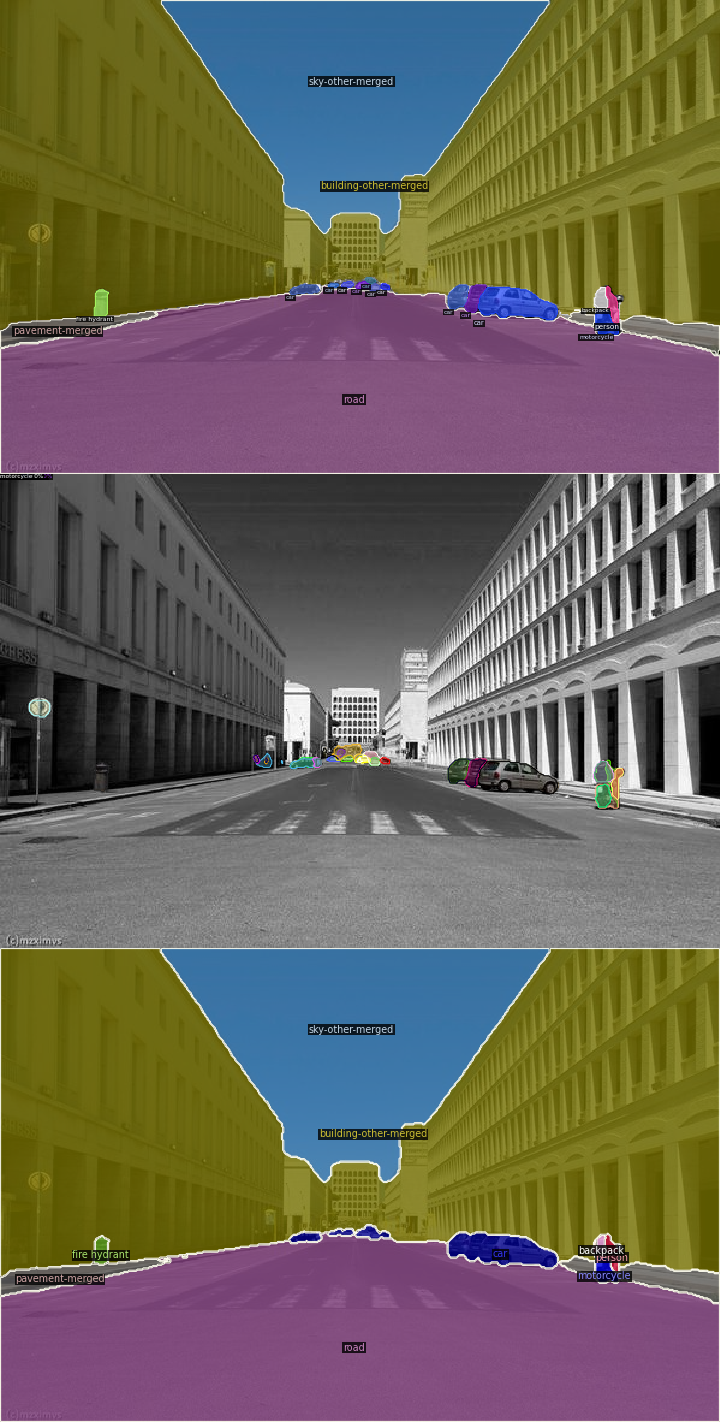

In [ ]:
# Show panoptic/instance/semantic predictions: 
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
panoptic_result = v.draw_panoptic_seg(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1]).get_image()
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
instance_result = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
semantic_result = v.draw_sem_seg(outputs["sem_seg"].argmax(0).to("cpu")).get_image()
print("Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)")
cv2_imshow(np.concatenate((panoptic_result, instance_result, semantic_result), axis=0)[:, :, ::-1])

In [113]:
outputs['instances'].pred_classes.cpu().tolist()

[2,
 0,
 2,
 2,
 10,
 12,
 0,
 2,
 0,
 0,
 0,
 7,
 0,
 9,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 9,
 2,
 24,
 0,
 2,
 2,
 0,
 0,
 9,
 11,
 74,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 7,
 2,
 2,
 11,
 0,
 0,
 24,
 26,
 7,
 7,
 2,
 2,
 10,
 2,
 3]

In [101]:
areas=pd.DataFrame(outputs['panoptic_seg'][1])

In [106]:
meta=coco_metadata.as_dict()
categ=pd.DataFrame(zip(meta['stuff_classes'],meta['stuff_colors']),columns=['class','color'])
categ['color']=categ['color'].apply(lambda x:tuple(x))
#categ

,class,color
0,person,"(220, 20, 60)"
1,bicycle,"(119, 11, 32)"
2,car,"(0, 0, 142)"
3,motorcycle,"(0, 0, 230)"
4,airplane,"(106, 0, 228)"
...,...,...
128,food-other-merged,"(152, 161, 64)"
129,building-other-merged,"(116, 112, 0)"
130,rock-merged,"(0, 114, 143)"
131,wall-other-merged,"(102, 102, 156)"


In [112]:
obj=categ.merge(areas,left_index=True,right_on='category_id',how='right')
sumtab=pd.DataFrame(obj.groupby('class')['area'].sum())
sumtab['percent']=round(sumtab['area']/sumtab['area'].sum()*100,2)
sumtab

,area,percent
class,,
backpack,171.0,0.07
building-other-merged,114721.0,48.49
car,2320.0,0.98
fire hydrant,251.0,0.11
motorcycle,314.0,0.13
pavement-merged,3331.0,1.41
person,201.0,0.08
road,78835.0,33.32
sky-other-merged,36432.0,15.40


On a different image:

In [115]:
from google.colab import drive
# Téléchargement de données locales 
drive.mount(mountpoint='/content/drive', force_remount=True)

for i in [1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 31, 33, 35, 36, 38]:
  srcImg = f'/content/drive/My Drive/EPFL/_RESEARCH/CRENAU/Photos/Saliency/Collection/Segmentation/img/{i}a.jpg'
  im = cv2.imread(srcImg)
  # cv2_imshow(im)

  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
  panoptic_result = v.draw_panoptic_seg(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1]).get_image()
  # cv2_imshow(panoptic_result[:, :, ::-1])

  areas=pd.DataFrame(outputs['panoptic_seg'][1])
  obj=categ.merge(areas,left_index=True,right_on='category_id',how='right')
  sumtab=pd.DataFrame(obj.groupby('class')['area'].sum())
  sumtab['percent']=round(sumtab['area']/sumtab['area'].sum()*100,2)
  sumtab.to_excel(f'/content/drive/My Drive/EPFL/_RESEARCH/CRENAU/Photos/Saliency/Collection/Segmentation/panoptic_seg/pan_seg_{i}a.xlsx')

  dstImg = f'/content/drive/My Drive/EPFL/_RESEARCH/CRENAU/Photos/Saliency/Collection/Segmentation/panoptic_seg/pan_seg_{i}a.jpg'
  cv2.imwrite(dstImg, panoptic_result[:, :, ::-1])
  # break

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/Mask2Former/mask2former/modeling/transformer_decoder/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperatu